In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats

matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
path = './image_2/'

In [2]:
from scipy import signal
def nonmaxsuppts(cim, radius, thresh):
    """ Binarize and apply non-maximum suppresion.   
    
        Args:
            cim: the harris 'R' image
            radius: the aperture size of local maxima window
            thresh: the threshold value for binarization
                    
        Returns: 
            r, c: two numpy vectors being the row (r) and the column (c) of each keypoint
    """   
    
    rows, cols = np.shape(cim)
    sze = 2 * radius + 1
    mx = signal.order_filter(cim, np.ones([sze, sze]), sze ** 2 - 1)
    bordermask = np.zeros([rows, cols]);
    bordermask[radius:(rows - radius), radius:(cols - radius)] = 1
    cim = np.array(cim)
    r, c = np.where((cim == mx) & (cim > thresh) & (bordermask == 1))
    return r, c

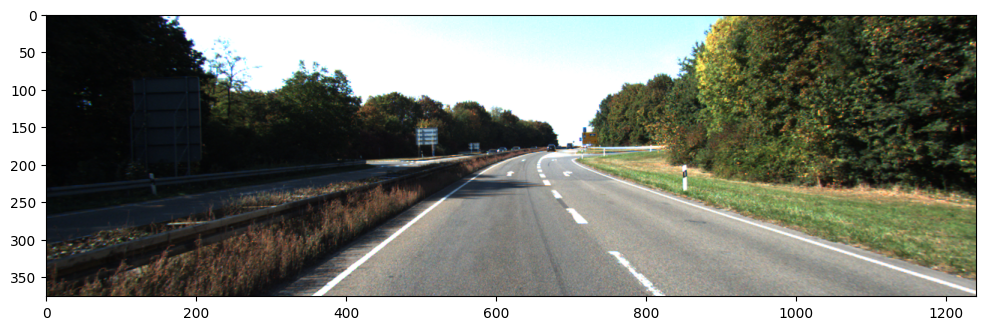

In [3]:
image = cv2.imread(path + 'umm_000091.png', -1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.imshow(image)
gray = cv2.imread(path + 'um_000001.png', 0)
plt.imshow(image)



(376, 1241, 3)


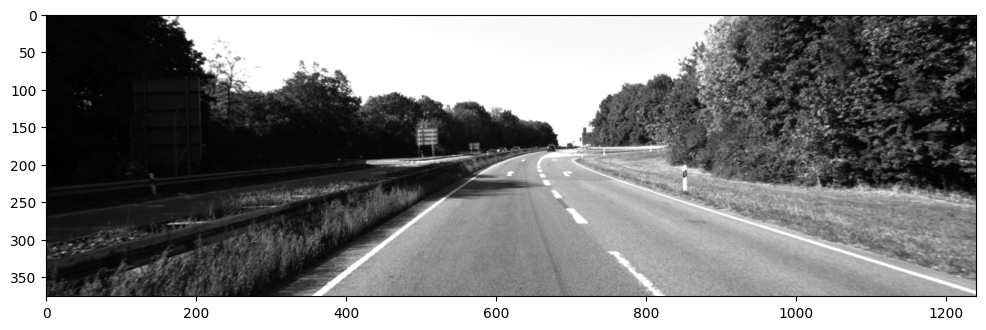

In [4]:
lab = cv2.cvtColor(image,cv2.COLOR_RGB2Lab)
h,w,c = lab.shape
print(lab.shape)
plt.imshow(lab[:,:,0], cmap='gray')

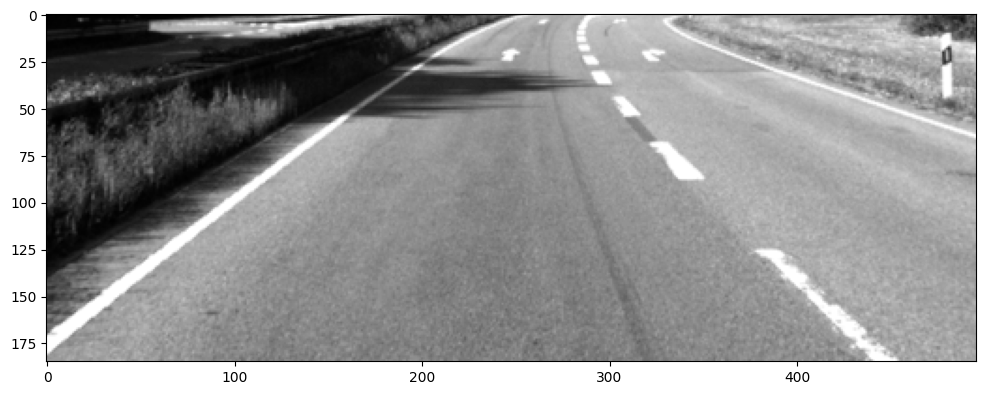

In [5]:
cropped = lab[int(0.51*h):h,int(0.3*w):int(0.7*w), :]
plt.imshow(cropped[:,:,0], cmap='gray')

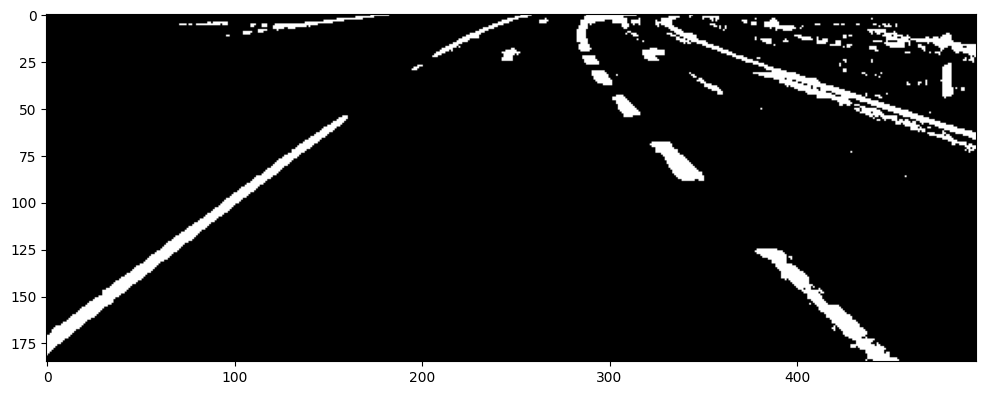

In [6]:
_,th = cv2.threshold(cropped[:,:,0], 200, 255, cv2.THRESH_BINARY)

plt.imshow(th,cmap='gray')



In [7]:
th = np.uint8(th)
edges = cv2.Canny(th,100,200,apertureSize = 3)

In [8]:
rho = 1
theta = np.pi/180
threshold = 175
lines = cv2.HoughLinesP(edges, rho, theta, threshold,
                        minLineLength=200,maxLineGap=15)
# For each line
for line in lines:
    # Draw the line in the RGB image
    x1,y1,x2,y2 = line[0]
    cv2.line(image,(x1,y1),(x2,y2),(255,0,0),2)

TypeError: 'NoneType' object is not iterable

In [ ]:
thresh = 0.3*harris.max()
_,th = cv2.threshold(harris, thresh, 255, cv2.THRESH_BINARY)
plt.imshow(th,cmap='gray')

In [ ]:
r,c = nonmaxsuppts(th, 15, thresh)
print(r.shape, ' ', c.shape)
for i in range( r.size):
    print(r[i], ' ', c[i])